# Fitting a Hologram

This notebook shows how to load a pre-recorded hologram of a colloidal sphere
into a Feature object and analyze it with Lorenz-Mie theory. The analysis yields
the radius of the sphere, the refractive index of the sphere, and the sphere's
three-dimensional location relative to the center of the imaging plane.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

from pylorenzmie.utilities import configuration as config
config.use_catch = True
from pylorenzmie.analysis import Frame

## Framework for Lorenz-Mie analysis
First, we instantiate a Frame() object. By default, Frame analyzes features with 
the standard Lorenz-Mie model for hologram formation. The model includes a description of the holographic microscope that records the images we wish to analyze. In this example, we specify that the instrument illuminates the sample with blue light at a vacuum wavelength of $\lambda$ = 0.447 μm and has a system magnification of 0.048 μm/pixel. For particles dispersed in water, the refractive index of the medium is $n_m$ = 1.340 at the imaging wavelength. These calibration constants may differ for different hardware implementations.
The commercial xSight instrument, for example, uses a system magnification of 0.120 μm/pixel.

In [2]:
configuration = dict(wavelength = 0.447,    # [um]
                     magnification = 0.048, # [um/pixel]
                     n_m = 1.34, 
                     distribution = 'radial',
                     percentpix = 0.1)

frame = Frame(**configuration)

Adding autoShape... 


## Read in holographic microscopy data
Next, we load the (normalized) hologram we wish to fit. In the present example, we use OpenCV to load a pre-recorded hologram that was saved as a PNG image. We convert the image to grayscale and normalize it by the mean value. This hologram was cropped from a larger image. Since we are not interested in locating the particle within the original image, we provide the model with a standard coordinate system using the coordinates() helper function. We finally can provide the normalized image data to the Feature() object for analysis.

In [3]:
def report(frame, results):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(frame.data, cmap='gray')
    ax.scatter(results.x_p, results.y_p, c='r')
    for bbox in frame.bboxes:
        ax.add_patch(Rectangle(*bbox, fill=False, ec='r'))
    print(results)

## Load the recorded image into the Frame

          x_p      dx_p         y_p      dy_p         z_p      dz_p       a_p  \
0  376.433313  0.020737  481.934247  0.020135  181.673605  0.106164  0.771074   
1  907.744853  0.038790  484.798774  0.037178  179.242517  0.161332  0.496337   

       da_p       n_p      dn_p  success   npix    redchi  
0  0.001286  1.560386  0.000628     True  10956  2.814451  
1  0.001865  1.426034  0.000757     True  12744  0.906116  


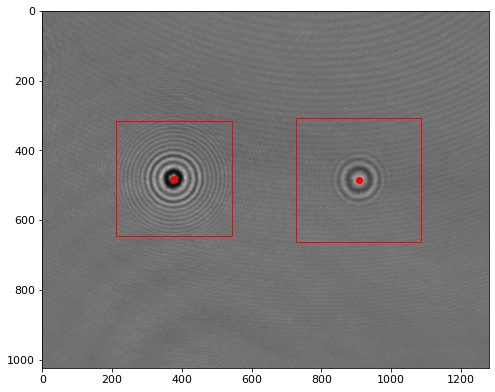

In [11]:
img = cv2.imread('tutorials/PS_silica.png', 0).astype(float)
img /= np.mean(img)

results = frame.analyze(img)

report(frame, results)

## Now that it's all set up, run it again

           x_p      dx_p         y_p      dy_p         z_p       dz_p  \
0   562.088570  0.059714  720.586408  0.057795  177.457651   0.228430   
1   919.945172  0.061734  732.431416  0.056212  171.055096   0.217987   
2   756.587812  4.505195  394.093931  4.027227  150.480971  11.764240   
3  1103.381637  5.955141  201.488396  4.970651  119.820314  11.253304   

        a_p      da_p       n_p      dn_p  success   npix    redchi  
0  2.090779  0.002396  1.369643  0.000126     True  29376  6.955795  
1  2.067615  0.002300  1.370222  0.000121     True  29811  6.733029  
2  0.321934  0.198583  1.342170  0.003316     True  34928  2.701510  
3  0.163300  0.529867  1.335997  0.032486     True  12040  1.559925  


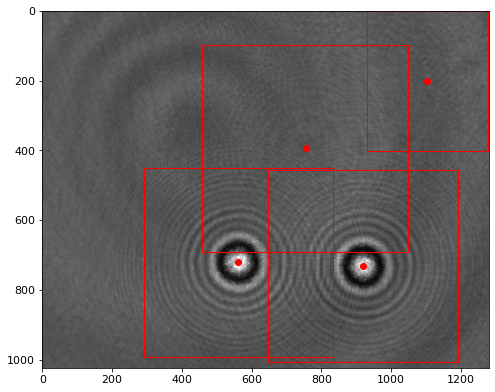

In [12]:
img = cv2.imread('tutorials/image0010.png', 0).astype(float)
img /= np.mean(img)

results = frame.analyze(img)

report(frame, results)